In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [3]:
from google.colab import files
uploaded = files.upload()   # upload Raisin_Dataset.xlsx manually

import pandas as pd
df = pd.read_excel("Raisin_Dataset.xlsx")
df.head()

Saving Raisin_Dataset.xlsx to Raisin_Dataset.xlsx


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [4]:
print("\nMissing values in dataset:")
print(df.isnull().sum())

# b) Encode Class: Kecimen -> 0, Besni -> 1
df['Class'] = df['Class'].map({"Kecimen": 0, "Besni": 1})
print("\nEncoded Class column:")
print(df['Class'].value_counts())

# c) Feature Importance with Chi-Square
X = df.drop("Class", axis=1)
y = df["Class"]

# chi2 requires non-negative values → scale features to [0,1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

chi2_vals, p_vals = chi2(X_scaled, y)

chi2_df = pd.DataFrame({
    "Feature": X.columns,
    "Chi2_Val": chi2_vals,
    "p_val": p_vals
}).sort_values(by="Chi2_Val", ascending=False)

print("\nChi-Square Feature Importance:")
display(chi2_df)

# d) Discard least important feature (example: lowest chi2 value)
least_important = chi2_df.iloc[-1]["Feature"]
print(f"\nDiscarding least important feature: {least_important}")

X = X.drop(columns=[least_important])


Missing values in dataset:
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

Encoded Class column:
Class
0    450
1    450
Name: count, dtype: int64

Chi-Square Feature Importance:


,Feature,Chi2_Val,p_val
0,Area,40.913845,1.590901e-10
4,ConvexArea,35.662379,2.346520e-09
1,MajorAxisLength,34.625936,3.995473e-09
6,Perimeter,26.290246,2.937686e-07
2,MinorAxisLength,14.726018,1.243189e-04
3,Eccentricity,5.311431,2.118595e-02
5,Extent,0.422287,5.157982e-01



Discarding least important feature: Extent


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [6]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

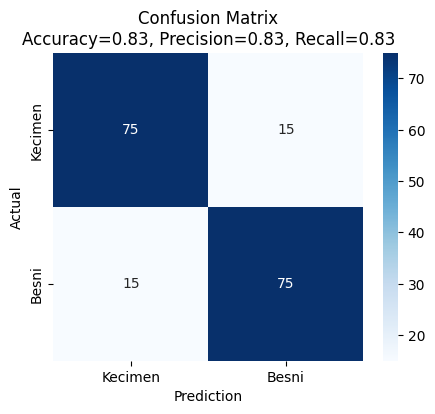


Accuracy: 0.8333333333333334
Precision: 0.8333333333333334
Recall: 0.8333333333333334


In [11]:
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Kecimen", "Besni"],
            yticklabels=["Kecimen", "Besni"])
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix\nAccuracy={acc:.2f}, Precision={prec:.2f}, Recall={rec:.2f}")
plt.show()

print("\nAccuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)


/tmp/ipython-input-2089946041.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


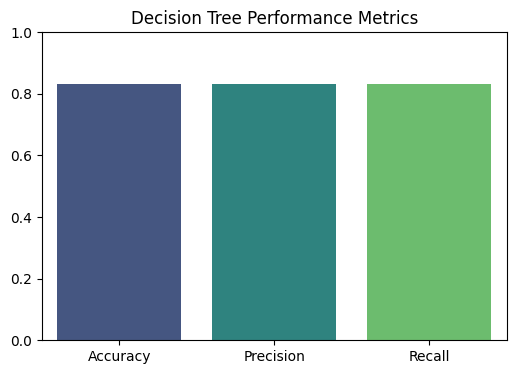

In [8]:
metrics = {"Accuracy": acc, "Precision": prec, "Recall": rec}
plt.figure(figsize=(6,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Decision Tree Performance Metrics")
plt.ylim(0,1)
plt.show()